In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import heapq
import matplotlib.pyplot as plt

# The undirected, unweighted graph G1
represented as vertex-list

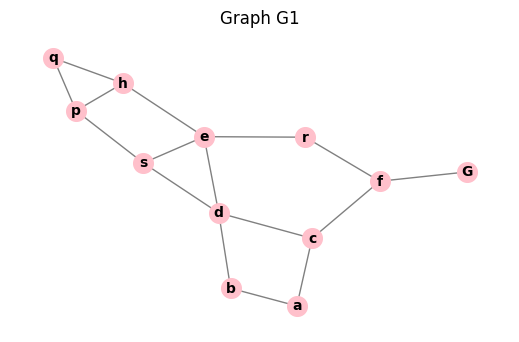

In [85]:
G1 = {
    's': ['p', 'd', 'e'],
    'p': ['s', 'h', 'q'],
    'd': ['s', 'b', 'c', 'e'],
    'a': ['b', 'c'],
    'b': ['d', 'a'],
    'c': ['d', 'a', 'f'],
    'e': ['s', 'd', 'h', 'r'],
    'f': ['c', 'r', 'G'],
    'h': ['p', 'e', 'q'],
    'q': ['p', 'h'],
    'r': ['e', 'f'],
    'G': ['f']
}

G1 = nx.Graph(G1)
plt.figure(figsize=(5, 3))
nx.draw(G1, with_labels=True, node_color='pink', node_size=200, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Graph G1")
plt.show()


# The directed unweighted graph G2
represented as vertex-list

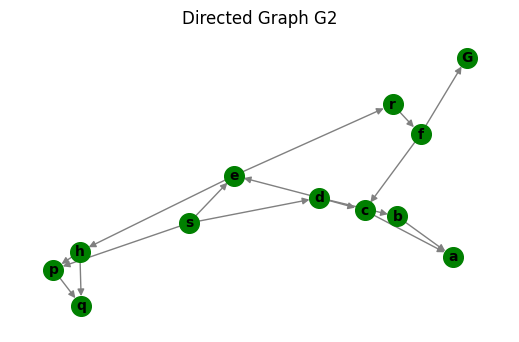

In [86]:
G2 = {
    's': ['d', 'e', 'p'],   
    'p': ['q'],             
    'q': [],               
    'd': ['b', 'c', 'e'],   
    'e': ['h', 'r'],        
    'f': ['G', 'c'],        
    'r': ['f'],             
    'a': [],                
    'b': ['a'],             
    'c': ['a'],             
    'h': ['p', 'q'],        
    'G': []                
}

G2= nx.DiGraph(G2)
plt.figure(figsize=(5, 3))
nx.draw(G2, with_labels=True, node_color='g', node_size=200, font_size=10, font_weight='bold', edge_color='gray', arrows=True)
plt.title("Directed Graph G2")
plt.show()


#  Perform DFS using stack for search and function call recursion

In [87]:
def dfs_recursive(graph, node, goal, visited=None, expanded=None, path=None):
    if visited is None:
        visited = set()
    if expanded is None:
        expanded = []
    if path is None:
        path = []

    visited.add(node)
    expanded.append(node)
    path.append(node)

    if node == goal:
        return path, expanded

    for neighbor in sorted(graph[node]):
        if neighbor not in visited:
            result, expanded_result = dfs_recursive(graph, neighbor, goal, visited, expanded, path)
            if result:
                return result, expanded_result

    path.pop()
    return None, expanded


# G1 output

In [88]:
dfs_path_rec, dfs_expanded_rec = dfs_recursive(G1, 's', 'G')
print("dfs state expanded:", " ,".join(dfs_expanded_rec))
print("dfs path:", " , ".join(dfs_path_rec))

dfs state expanded: s ,d ,b ,a ,c ,f ,G
dfs path: s , d , b , a , c , f , G


# G2 output

In [89]:
dfs_path_rec, dfs_expanded_rec = dfs_recursive(G2, 's', 'G')
print("dfs state expanded:", " ,".join(dfs_expanded_rec))
print("dfs path:", " , ".join(dfs_path_rec))

dfs state expanded: s ,d ,b ,a ,c ,e ,h ,p ,q ,r ,f ,G
dfs path: s , d , e , r , f , G


# Perform DFS using stack for search and (stack + while loop) to replace recursion calls. 

In [90]:
def dfs_iterative(graph, start, goal):
    visited = set()
    stack = [(start, [start])]
    expanded = []

    while stack:
        node, path = stack.pop()

        if node not in visited:
            visited.add(node)
            expanded.append(node)

            if node == goal:
                return path, expanded

            for neighbor in sorted(graph[node], reverse=True):
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))

    return None, expanded

# G1 output

In [91]:
dfs_path_iter, dfs_expanded_iter = dfs_iterative(G1, 's', 'G')
print("dfs state expanded:", " , ".join(dfs_expanded_iter))
print("dfs final path:", " , ".join(dfs_path_iter))

dfs state expanded: s , d , b , a , c , f , G
dfs final path: s , d , b , a , c , f , G


# G2 output

In [92]:
dfs_path_iter, dfs_expanded_iter = dfs_iterative(G2, 's', 'G')
print("dfs state expanded:", " , ".join(dfs_expanded_iter))
print("dfs final path:", " , ".join(dfs_path_iter))

dfs state expanded: s , d , b , a , c , e , h , p , q , r , f , G
dfs final path: s , d , e , r , f , G


# Perform BFS using queue for search and function call recursion. 

In [93]:
def bfs_recursive(graph, queue, goal, visited=None, expanded=None):
    if visited is None:
        visited = set()
    if expanded is None:
        expanded = []

    if not queue:
        return None, expanded

    node, path = queue.popleft()
    if node not in visited:
        expanded.append(node)
        visited.add(node)  

        if node == goal:
            return path, expanded
        
        for neighbor in sorted(graph[node]):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    return bfs_recursive(graph, queue, goal, visited, expanded)

# G1 output

In [94]:
bfs_path_rec, bfs_expanded_rec = bfs_recursive(G1, deque([('s', ['s'])]), 'G')
print("bfs state Expanded:", " , ".join(bfs_expanded_rec))
print("bfs final path:", ",".join(bfs_path_rec))

bfs state Expanded: s , d , e , p , b , c , h , r , q , a , f , G
bfs final path: s,d,c,f,G


# G2 output

In [95]:
bfs_path_rec, bfs_expanded_rec = bfs_recursive(G2, deque([('s', ['s'])]), 'G')
print("bfs state Expanded:", " , ".join(bfs_expanded_rec))
print("bfs final path:", ",".join(bfs_path_rec))

bfs state Expanded: s , d , e , p , b , c , h , r , q , a , f , G
bfs final path: s,e,r,f,G


# Perform BFS using queue for search and (stack + while loop) to replace recursion calls. 

In [96]:
def bfs_iterative(graph, start, goal):
    visited = set()
    queue = deque([(start, [start])])
    expanded = []

    while queue:
        node, path = queue.popleft()

        if node not in visited:
            visited.add(node)
            expanded.append(node)

            if node == goal:
                return path, expanded

            for neighbor in sorted(graph[node]):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))

    return None, expanded

# G1 output

In [97]:
bfs_path_iter, bfs_expanded_iter = bfs_iterative(G1, 's', 'G')
print("bfs expanded:", " , ".join(bfs_expanded_iter))
print("bfs path:", " , ".join(bfs_path_iter))

bfs expanded: s , d , e , p , b , c , h , r , q , a , f , G
bfs path: s , d , c , f , G


# G2 output

In [98]:
bfs_path_iter, bfs_expanded_iter = bfs_iterative(G2, 's', 'G')
print("bfs expanded:", " , ".join(bfs_expanded_iter))
print("bfs path:", " , ".join(bfs_path_iter))

bfs expanded: s , d , e , p , b , c , h , r , q , a , f , G
bfs path: s , e , r , f , G


# graph G1 represented as adjacency matrix

In [99]:
adj_G1 = np.array([
    #  s  p  d  a  b  c  e  f  h  q  r  G
    [ 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # s
    [ 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],  # p
    [ 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],  # d
    [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],  # a
    [ 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # b
    [ 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],  # c
    [ 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],  # e
    [ 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],  # f
    [ 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],  # h
    [ 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # q
    [ 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],  # r
    [ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # G
])

node_map_G1 = {'s': 0, 'p': 1, 'd': 2, 'a': 3, 'b': 4, 'c': 5, 'e': 6, 'f': 7, 'h': 8, 'q': 9, 'r': 10, 'G': 11}
index_to_node_G1 = {v: k for k, v in node_map.items()}

# graph G2 represented as adjacency matrix

In [100]:
adj_G2 = np.array([
    #  s  p  q  d  e  f  r  a  b  c  h  G
    [ 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # s
    [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # p
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # q
    [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],  # d
    [ 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],  # e
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # f
    [ 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # r
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # a
    [ 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],  # b
    [ 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],  # c
    [ 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # h
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # G
])
node_map_G2 = {'s': 0, 'p': 1, 'q': 2, 'd': 3, 'e': 4, 'f': 5, 'r': 6, 'a': 7, 'b': 8, 'c': 9, 'h': 10, 'G': 11}
index_to_node_G2 = {0: 's', 1: 'p', 2: 'q', 3: 'd', 4: 'e', 5: 'f', 6: 'r', 7: 'a', 8: 'b', 9: 'c', 10: 'h', 11: 'G'}


In [101]:
def dfs_recursive(matrix, start, goal, path=None, expanded=None):
    if path is None:
        path = []
    if expanded is None:
        expanded = []

    path.append(start)
    expanded.append(start)

    if start == goal:
        return path, expanded

    for neighbor, connected in enumerate(matrix[start]):
        if connected and neighbor not in path:
            result, exp = dfs_recursive(matrix, neighbor, goal, path, expanded)
            if result:
                return result, exp

    path.pop()
    return None, expanded

# G1 output

In [102]:
dfs_path_rec, dfs_expanded_rec = dfs_recursive(adj_G1, node_map_G1['s'], node_map_G1['G'])
print("dfs state expanded:", " , ".join([index_to_node[node] for node in dfs_expanded_rec]))
print("dfs path:", " , ".join([index_to_node[node] for node in dfs_path_rec]))

dfs state expanded: s , p , h , e , d , b , a , c , f , r , G
dfs path: s , p , h , e , d , b , a , c , f , G


# G2 output

In [103]:
dfs_path_rec, dfs_expanded_rec = dfs_recursive(adj_G2, node_map_G2['s'], node_map_G2['G'])
print("dfs state expanded:", " , ".join([index_to_node[node] for node in dfs_expanded_rec]))
print("dfs path:", " , ".join([index_to_node[node] for node in dfs_path_rec]))

dfs state expanded: s , p , d , a , h , f , q , f , r , p , d , d , b , e , c , q , a , h , f , r , p , d , d , f , G
dfs path: s , b , e , c , G


In [104]:
def dfs_iterative(matrix, start, goal):
    stack = [(start, [start])]
    visited = set()
    expanded = []

    while stack:
        node, path = stack.pop()

        if node not in visited:
            visited.add(node)
            expanded.append(node)

            if node == goal:
                return path, expanded

            for neighbor in range(len(matrix[node])-1, -1, -1):  # we should add in reverse for correct order
                if matrix[node][neighbor] == 1 and neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))
    return path, expanded

# G1 output

In [105]:
dfs_path_iter, dfs_expanded_iter = dfs_iterative(adj_G1, node_map_G1['s'], node_map_G1['G'])
print("dfs state expanded:", ", ".join([index_to_node[node] for node in dfs_expanded_iter]))
print("dfs path:", " , ".join([index_to_node[node] for node in dfs_path_iter]))

dfs state expanded: s, p, h, e, d, b, a, c, f, r, G
dfs path: s , p , h , e , d , b , a , c , f , G


# G2 output

In [106]:
dfs_path_iter, dfs_expanded_iter = dfs_iterative(adj_G2, node_map_G2['s'], node_map_G2['G'])
print("dfs state expanded:", ", ".join([index_to_node[node] for node in dfs_expanded_iter]))
print("dfs path:", " , ".join([index_to_node[node] for node in dfs_path_iter]))

dfs state expanded: s, p, d, a, h, f, q, r, b, e, c, G
dfs path: s , b , e , c , G


In [107]:
def bfs_recursive(matrix, queue, goal, visited=None, expanded=None):
    if visited is None:
        visited = set()
    if expanded is None:
        expanded = []

    if not queue:
        return None, expanded

    node, path = queue.popleft()
    if node not in visited:
        expanded.append(node)
        visited.add(node) 

        if node == goal:
            return path, expanded

        for neighbor, connected in enumerate(matrix[node]):
            if connected and neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    return bfs_recursive(matrix, queue, goal, visited, expanded)

# G1 output

In [108]:

bfs_queue = deque([(node_map_G1['s'], [node_map_G1['s']])])
bfs_path_rec, bfs_expanded_rec = bfs_recursive(adj_G1, bfs_queue, node_map_G1['G'])
print("bfs state expanded:", " , ".join([index_to_node[node] for node in bfs_expanded_rec]))
print("bfs path:", " , ".join([index_to_node[node] for node in bfs_path_rec]))

bfs state expanded: s , p , d , e , h , q , b , c , r , a , f , G
bfs path: s , d , c , f , G


# G2 output

In [109]:
bfs_queue = deque([(node_map_G2['s'], [node_map_G2['s']])])
bfs_path_rec, bfs_expanded_rec = bfs_recursive(adj_G2, bfs_queue, node_map_G2['G'])
print("bfs state expanded:", " , ".join([index_to_node[node] for node in bfs_expanded_rec]))
print("bfs path:", " , ".join([index_to_node[node] for node in bfs_path_rec]))

bfs state expanded: s , p , a , b , d , h , q , r , e , f , c , G
bfs path: s , b , e , c , G


In [110]:
def bfs_iterative(matrix, start, goal):
    queue = deque([(start, [start])])
    visited = set()
    expanded = []

    while queue:
        node, path = queue.popleft()

        if node not in visited:
            visited.add(node)
            expanded.append(node)

            if node == goal:
                return path, expanded

            for neighbor in range(len(matrix[node])):
                if matrix[node][neighbor] == 1 and neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
    return path, expanded

# G1 output

In [111]:
bfs_path_iter, bfs_expanded_iter = bfs_iterative(adj_G1, node_map['s'], node_map['G'])
print("bfs state expanded:", " , ".join([index_to_node[node] for node in bfs_expanded_iter]))
print("bfs path:", " , ".join([index_to_node[node] for node in bfs_path_iter]))


bfs state expanded: s , p , d , e , h , q , b , c , r , a , f , G
bfs path: s , d , c , f , G


# G2 output

In [112]:
bfs_path_iter, bfs_expanded_iter = bfs_iterative(adj_G2, node_map_G2['s'], node_map_G2['G'])
print("bfs state expanded:", " , ".join([index_to_node[node] for node in bfs_expanded_iter]))
print("bfs path:", " , ".join([index_to_node[node] for node in bfs_path_iter]))

bfs state expanded: s , p , a , b , d , h , q , r , e , f , c , G
bfs path: s , b , e , c , G


# The undirected, weighted graph G3
represented as vertex-list

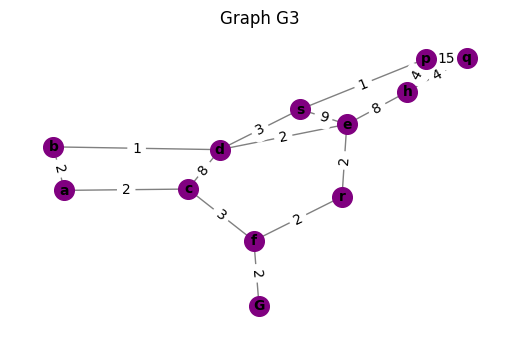

In [113]:
G3_weighted = {
    's': {'p': 1, 'd': 3, 'e': 9},
    'p': {'s': 1, 'h': 4, 'q': 15},
    'd': {'s': 3, 'b': 1, 'c': 8, 'e': 2},
    'a': {'b': 2, 'c': 2},
    'b': {'d': 1, 'a': 2},
    'c': {'d': 8, 'a': 2, 'f': 3},
    'e': {'s': 9, 'd': 2, 'h': 8, 'r': 2},
    'f': {'c': 3, 'r': 2, 'G': 2},
    'h': {'p': 4, 'e': 8, 'q': 4},
    'q': {'p': 15, 'h': 4},
    'r': {'e': 2, 'f': 2},
    'G': {'f': 2}
}


G3 = nx.Graph()
for node, edges in G3_weighted.items():
    for neighbor, weight in edges.items():
        G3.add_edge(node, neighbor, weight=weight)

pos = nx.spring_layout(G3) 
plt.figure(figsize=(5, 3))
nx.draw(G3, pos, with_labels=True, node_color='purple', node_size=200, font_size=10, font_weight='bold', edge_color='gray')

edge_labels = nx.get_edge_attributes(G3, 'weight')
nx.draw_networkx_edge_labels(G3, pos, edge_labels=edge_labels)

plt.title("Graph G3")
plt.show()


# The directed, weighted graph G4
represented as vertex-list

In [114]:
G4_weighted = {
    's': {'p': 1, 'd': 3, 'e': 9},
    'p': {'q': 15},
    'd': {'b': 1, 'c': 8, 'e': 2},
    'a': {},
    'b': {'a': 2},
    'c': {'a': 2},
    'e': {'r': 2, 'h': 8},
    'f': {'G': 2, 'c': 3},
    'h': {'p': 4, 'q': 4},
    'q': {},
    'r': {'f': 2},
    'G': {}
}

# Perform UCS using PQ

In [115]:
def ucs_vertex_list(graph, start, goal):
    queue = [(0, start, [])]
    visited = set()  # storing visited nodes
    expanded = []  # storing expanded nodes

    while queue:
        (cost, node, path) = heapq.heappop(queue)  # Get node with highest priority which means it should get the smallest cost

        if node in visited:
            continue

        path = path + [node]
        expanded.append(node)
        visited.add(node)

        # If goal is reached, return the path and expanded nodes
        if node == goal:
            return cost, path, expanded

        for neighbor, weight in sorted(graph[node].items()):
            if neighbor not in visited:
                heapq.heappush(queue, (cost + weight, neighbor, path))

    return float('inf'), [], expanded


# G3 output

In [116]:
ucs_cost, ucs_path, ucs_expanded = ucs_vertex_list(G3_weighted, 's', 'G')
print("UCS Search State Expanded:", " , ".join(ucs_expanded))
print("UCS Path Returned:", " , ".join(ucs_path))
print("Total Cost (Vertex List):", ucs_cost)


UCS Search State Expanded: s , p , d , b , e , h , a , r , c , f , q , G
UCS Path Returned: s , d , e , r , f , G
Total Cost (Vertex List): 11


# G4 output

In [117]:
ucs_cost_vl, ucs_path_vl, ucs_expanded_vl = ucs_vertex_list(G4_weighted, 's', 'G')
print("UCS Search State Expanded (Vertex List):", " , ".join(ucs_expanded_vl))
print("UCS Path Returned:", " , ".join(ucs_path_vl))
print("Total Cost:", ucs_cost_vl)

UCS Search State Expanded (Vertex List): s , p , d , b , e , a , r , f , G
UCS Path Returned: s , d , e , r , f , G
Total Cost: 11


# Graph G3 represented as adjacency matrix

In [118]:
adj_G3 = np.array([
    # s   p   d   a   b   c   e   f   h   q   r   G
    [ 0,  1,  3,  0,  0,  0,  9,  0,  0,  0,  0,  0],  # s
    [ 1,  0,  0,  0,  0,  0,  0,  0,  4, 15,  0,  0],  # p
    [ 3,  0,  0,  0,  1,  8,  2,  0,  0,  0,  0,  0],  # d
    [ 0,  0,  0,  0,  2,  2,  0,  0,  0,  0,  0,  0],  # a
    [ 0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0],  # b
    [ 0,  0,  8,  2,  0,  0,  0,  3,  0,  0,  0,  0],  # c
    [ 9,  0,  2,  0,  0,  0,  0,  0,  8,  0,  2,  0],  # e
    [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  2,  2],  # f
    [ 0,  4,  0,  0,  0,  0,  8,  0,  0,  4,  0,  0],  # h
    [ 0, 15,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],  # q
    [ 0,  0,  0,  0,  0,  0,  2,  2,  0,  0,  0,  0],  # r
    [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0]   # G
])

index_to_node = {0: 's', 1: 'p', 2: 'd', 3: 'a', 4: 'b', 5: 'c', 6: 'e', 7: 'f', 8: 'h', 9: 'q', 10: 'r', 11: 'G'}
node_to_index = {v: k for k, v in index_to_node.items()}

# Graph G4 represented as adjacency matrix

In [119]:
adj_G4 = np.array([
    # s   p   d   a   b   c   e   f   h   q   r   G
    [ 0,  1,  3,  0,  0,  0,  9,  0,  0,  0,  0,  0],  # s
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0],  # p
    [ 0,  0,  0,  0,  1,  8,  2,  0,  0,  0,  0,  0],  # d
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],  # a
    [ 0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],  # b
    [ 0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],  # c
    [ 0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  2,  0],  # e
    [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  2],  # f
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0],  # h
    [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],  # q
    [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0],  # r
    [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0]   # G
])

index_to_node_G4 = {0: 's', 1: 'p', 2: 'd', 3: 'a', 4: 'b', 5: 'c', 6: 'e', 7: 'f', 8: 'h', 9: 'q', 10: 'r', 11: 'G'}
node_to_index_G4 = {v: k for k, v in index_to_node_G4.items()}

# Perform UCS using PQ

In [120]:
def ucs_adjacency_matrix(matrix, start, goal):
    queue = [(0, start, [])]
    visited = set()  
    expanded = []

    while queue:
        (cost, node, path) = heapq.heappop(queue)
        if node in visited:
            continue

        path = path + [node]
        expanded.append(node)
        visited.add(node)

        if node == goal:
            return cost, path, expanded

        for neighbor, weight in enumerate(matrix[node]):
            if weight > 0 and neighbor not in visited:
                heapq.heappush(queue, (cost + weight, neighbor, path))

    return float('inf'), [], expanded

# G3 output

In [121]:
ucs_cost, ucs_path_indices, ucs_expanded_indices = ucs_adjacency_matrix(adj_G3, node_to_index['s'], node_to_index['G'])

print("UCS Search State Expanded (Adjacency Matrix):", " , ".join([index_to_node[i] for i in ucs_expanded_indices]))
print("UCS Path Returned:", " , ".join([index_to_node[i] for i in ucs_path_indices]))
print("Total Cost:", ucs_cost)


UCS Search State Expanded (Adjacency Matrix): s , p , d , b , e , h , a , r , c , f , q , G
UCS Path Returned: s , d , e , r , f , G
Total Cost: 11


# G4 output

In [122]:
ucs_cost_am, ucs_path_am, ucs_expanded_am = ucs_adjacency_matrix(adj_G4, node_to_index_G4['s'], node_to_index_G4['G'])
print("UCS Search State Expanded (Adjacency Matrix):", " , ".join([index_to_node[i] for i in ucs_expanded_am]))
print("UCS Path Returned:", " , ".join([index_to_node[i] for i in ucs_path_am]))
print("Total Cost:", ucs_cost_am)


UCS Search State Expanded (Adjacency Matrix): s , p , d , b , e , a , r , f , c , G
UCS Path Returned: s , d , e , r , f , G
Total Cost: 11
